In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing as HWES
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv("nasa1.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
df.index.freq = 'D'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2011-01-01 to 2024-10-31
Freq: D
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suhu         5050 non-null   float64
 1   Kelembaban   5050 non-null   float64
 2   Curah_Hujan  5050 non-null   float64
dtypes: float64(3)
memory usage: 157.9 KB


In [4]:
df.describe()
#NASA Sebelum Imputasi

,Suhu,Kelembaban,Curah_Hujan
count,5050.000000,5050.000000,5050.000000
mean,26.990713,79.178727,6.194432
std,0.826380,4.462853,10.158024
min,24.370000,63.690000,0.000000
25%,26.410000,76.250000,0.740000
50%,26.950000,79.250000,2.665000
75%,27.550000,82.250000,7.060000
max,30.070000,92.000000,149.120000


In [5]:
# Melihat jumlah nilai null di setiap kolom
null_counts = df.isnull().sum()
print(null_counts)

Suhu           3
Kelembaban     3
Curah_Hujan    3
dtype: int64


In [6]:
# Mengisi data kosong dengan mean dari masing-masing kolom
cols_to_fill = ['Curah_Hujan', 'Kelembaban', 'Suhu']  # Kolom target

for col in cols_to_fill:
    mean_value = df[col].mean()  # Menghitung mean dari kolom
    df[col] = df[col].fillna(mean_value)  # Mengisi nilai kosong dengan mean

print(df)

             Suhu  Kelembaban  Curah_Hujan
Tanggal                                   
2011-01-01  26.02       81.94        10.95
2011-01-02  25.93       84.81         6.97
2011-01-03  26.10       80.88         4.85
2011-01-04  25.73       80.56         9.94
2011-01-05  25.60       84.00         5.04
...           ...         ...          ...
2024-10-27  27.44       79.94         2.33
2024-10-28  27.52       79.69         1.27
2024-10-29  27.20       80.50         1.39
2024-10-30  27.35       79.31         1.97
2024-10-31  27.82       75.31         0.41

[5053 rows x 3 columns]


In [7]:
df.describe()
#Nasa Setelah Imputasi

,Suhu,Kelembaban,Curah_Hujan
count,5053.000000,5053.000000,5053.000000
mean,26.990713,79.178727,6.194432
std,0.826134,4.461528,10.155008
min,24.370000,63.690000,0.000000
25%,26.410000,76.250000,0.740000
50%,26.950000,79.250000,2.670000
75%,27.550000,82.250000,7.060000
max,30.070000,92.000000,149.120000


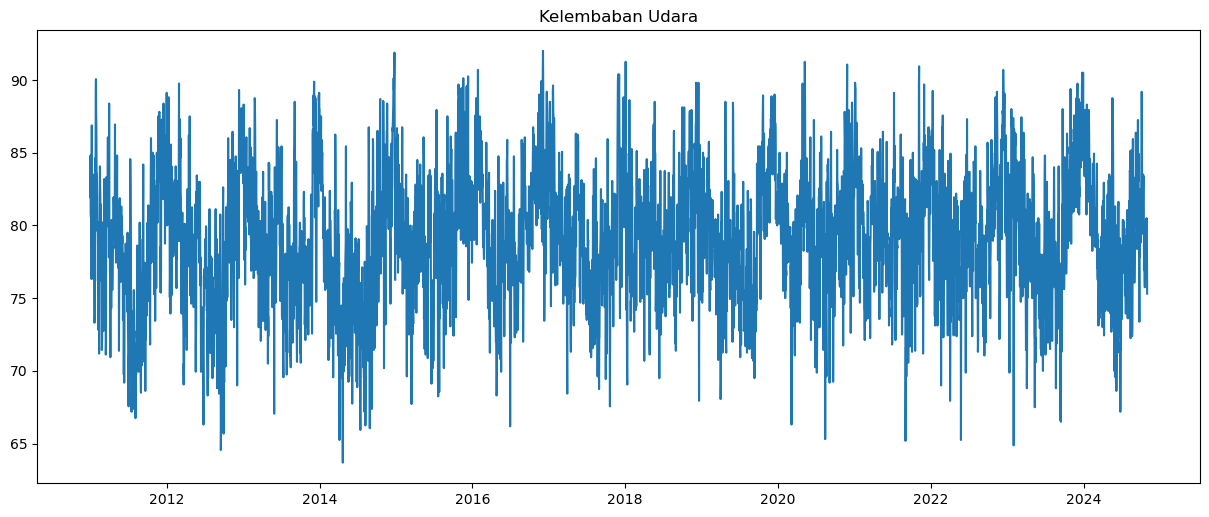

In [8]:
plt.figure(figsize=(15, 6), dpi=100)
plt.title('Kelembaban Udara')
plt.plot(df['Kelembaban'])

In [12]:
df = df.drop(columns=['Curah_Hujan', 'Suhu'])

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

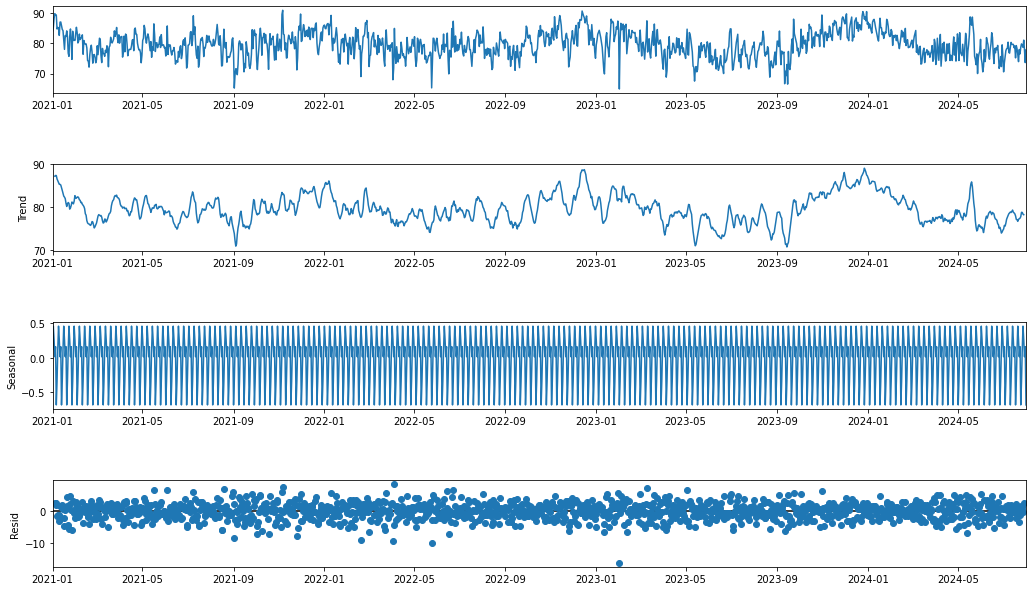

In [14]:
kl_decompose = seasonal_decompose(df, model = "additive")
fig = kl_decompose.plot()
fig.set_size_inches(16,9)
plt.show()

In [8]:
# Tentukan proporsi pembagian
train_size = int(len(df) * 0.9)

# Membagi data
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [9]:
train.tail()

,Suhu,Kelembaban,Curah_Hujan
Tanggal,,,
2023-06-09,28.22,76.00,1.18
2023-06-10,27.73,78.00,2.50
2023-06-11,28.70,71.50,0.31
2023-06-12,28.59,75.25,0.22
2023-06-13,28.79,72.69,0.14


In [10]:
test

,Suhu,Kelembaban,Curah_Hujan
Tanggal,,,
2023-06-14,28.99,71.06,0.22
2023-06-15,28.57,71.88,1.74
2023-06-16,28.45,74.19,3.56
2023-06-17,28.30,75.94,4.18
2023-06-18,28.25,72.75,0.81
...,...,...,...
2024-10-27,27.44,79.94,2.33
2024-10-28,27.52,79.69,1.27
2024-10-29,27.20,80.50,1.39


In [11]:
hwmodel=ExponentialSmoothing(train.Kelembaban,trend='add', seasonal='add', seasonal_periods=365,
                            damped_trend=True).fit(optimized=True)
print(hwmodel.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Kelembaban   No. Observations:                 4547
Model:             ExponentialSmoothing   SSE                          47263.328
Optimized:                         True   AIC                          11385.741
Trend:                         Additive   BIC                          13761.964
Seasonal:                      Additive   AICC                         11452.227
Seasonal Periods:                   365   Date:                 Sun, 22 Dec 2024
Box-Cox:                          False   Time:                         15:10:29
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.4925133                alpha                 True
smoothing_trend       

In [12]:
test_pred=hwmodel.forecast(506)

In [13]:
test_pred

2023-06-14    74.513722
2023-06-15    75.149182
2023-06-16    74.593526
2023-06-17    73.074374
2023-06-18    72.921980
                ...    
2024-10-27    77.796203
2024-10-28    78.770242
2024-10-29    79.240849
2024-10-30    77.558203
2024-10-31    77.478704
Freq: D, Length: 506, dtype: float64

<AxesSubplot:title={'center':'Kelembaban 80 : 20'}, xlabel='Tanggal'>

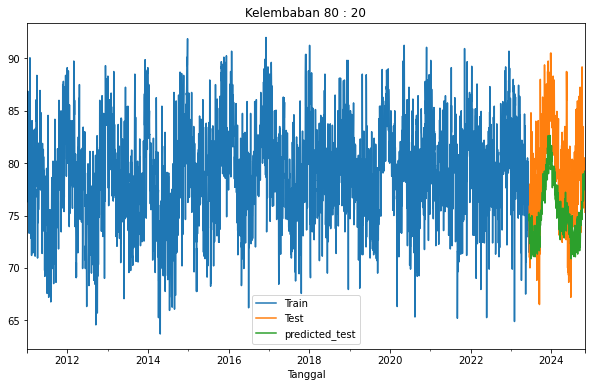

In [14]:
train['Kelembaban'].plot(legend=True, label='Train', figsize=(10,6))
test['Kelembaban'].plot(legend=True, label='Test')
plt.title('Kelembaban 80 : 20')
test_pred.plot(legend=True, label='predicted_test')

In [15]:
#Spliting data 90:10
from sklearn.metrics import mean_squared_error
# Calculate errors
errors = abs(test['Kelembaban'] - test_pred)
mae = np.mean(np.abs(errors))
mse = np.mean(errors**2)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 4.66
RMSE: 5.59


In [16]:
# Buat model Holt-Winters dengan parameter manual
hw_model = ExponentialSmoothing(
    df['Kelembaban'], 
    trend="add",            # Trend aditif
    seasonal="add",         # Seasonal aditif
    seasonal_periods=365     # Jumlah periode musiman (contoh: data bulanan)
)

# Fit model dengan parameter manual
fitted_model = hw_model.fit(
    smoothing_level=0.4925133,  # alpha
    smoothing_slope=8.8961e-05,  # beta
    smoothing_seasonal=0.0001608,  # gamma
    optimized=False  # Jangan optimalkan, gunakan parameter manual
)

C:\Users\USER\AppData\Local\Temp\ipykernel_11184\17184945.py:10: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = hw_model.fit(


In [17]:
# Hasil
print(fitted_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Kelembaban   No. Observations:                 5053
Model:             ExponentialSmoothing   SSE                          62748.346
Optimized:                        False   AIC                          13467.265
Trend:                         Additive   BIC                          15876.000
Seasonal:                      Additive   AICC                         13526.232
Seasonal Periods:                   365   Date:                 Sun, 22 Dec 2024
Box-Cox:                          False   Time:                         15:12:50
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.4925133                alpha                False
smoothing_trend       

In [18]:
# Prediksi ke depan
pred = fitted_model.forecast(steps=365)
print(pred)

2024-11-01    76.373832
2024-11-02    71.960899
2024-11-03    72.053286
2024-11-04    75.878801
2024-11-05    74.606200
                ...    
2025-10-27    77.664526
2025-10-28    77.914733
2025-10-29    80.174894
2025-10-30    77.434444
2025-10-31    78.171875
Freq: D, Length: 365, dtype: float64


In [19]:
# Simpan hasil prediksi ke dalam DataFrame (jika belum dalam DataFrame)
pred_df = pd.DataFrame({'Date': pred.index, 'Kelembaban': pred.values})

# Simpan ke file CSV
pred_df.to_csv('D:/cool/TA/data/HW kelembaban NASA.csv', index=False)

In [20]:
historical_data = df['Kelembaban']

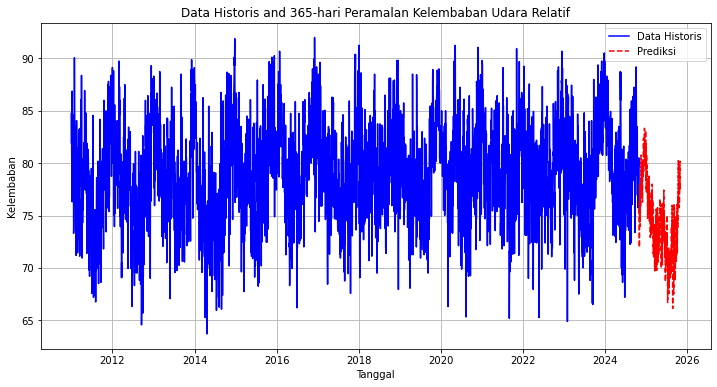

In [21]:
# Visualisasi
plt.figure(figsize=(12, 6))

# Plot data historis
plt.plot(historical_data.index, historical_data, label='Data Historis', color='blue')

# Plot prediksi
plt.plot(pred.index, pred.values, label='Prediksi', color='Red', linestyle='--')

# Tambahkan label dan judul
plt.xlabel('Tanggal')
plt.ylabel('Kelembaban')
plt.title('Data Historis and 365-hari Peramalan Kelembaban Udara Relatif')
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

In [24]:
final_model=ExponentialSmoothing(df.Kelembaban,trend='add', seasonal='add', seasonal_periods=365).fit()

In [25]:
pred=final_model.forecast(365)

In [26]:
pred

2024-08-01    76.719967
2024-08-02    74.864042
2024-08-03    72.178651
2024-08-04    74.803549
2024-08-05    74.931971
                ...    
2025-07-27    74.854414
2025-07-28    77.148334
2025-07-29    76.164164
2025-07-30    74.664073
2025-07-31    76.069120
Freq: D, Length: 365, dtype: float64

<AxesSubplot:xlabel='Tanggal'>

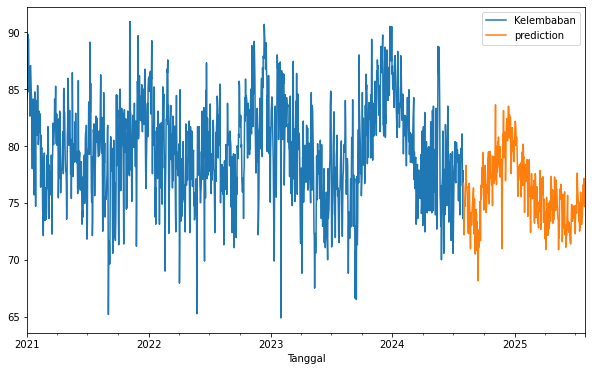

In [27]:
df['Kelembaban'].plot(legend=True, label='Kelembaban', figsize=(10,6))
pred.plot(legend=True, label='prediction')

In [ ]:
test_kl.plot(legend=True, label='Test')
test_kl.plot(legend=True, label='predicted_test')

In [56]:
model = HWES(train_kl, seasonal_periods = 365, trend = 'add', seasonal = "add")
fitted = model.fit()
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Kelembaban   No. Observations:                 1045
Model:             ExponentialSmoothing   SSE                           8028.560
Optimized:                         True   AIC                           2868.743
Trend:                         Additive   BIC                           4695.947
Seasonal:                      Additive   AICC                          3278.883
Seasonal Periods:                   365   Date:                 Tue, 13 Aug 2024
Box-Cox:                          False   Time:                         20:36:02
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.5524601                alpha                 True
smoothing_trend       

In [57]:
model = HWES(train_kl, seasonal_periods = 365, trend = 'add', seasonal = "mul")
fitted = model.fit(optimized=True, use_brute=True)
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Kelembaban   No. Observations:                 1045
Model:             ExponentialSmoothing   SSE                          10212.190
Optimized:                         True   AIC                           3120.146
Trend:                         Additive   BIC                           4947.350
Seasonal:                Multiplicative   AICC                          3530.285
Seasonal Periods:                   365   Date:                 Tue, 13 Aug 2024
Box-Cox:                          False   Time:                         20:36:15
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.5296300                alpha                 True
smoothing_trend       

D:\anaconda2\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [58]:
forecast = fitted.forecast(steps=12)

InvalidIndexError: (slice(None, None, None), None)

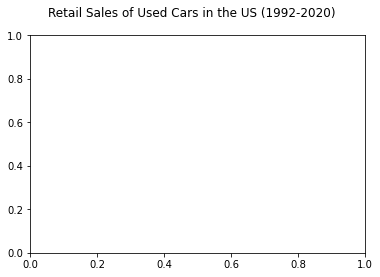

In [60]:
fig = plt.figure()
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(train_kl.index, train_kl, 'b.-', label='Sales History')
future, = plt.plot(test_kl.index, test_kl, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(test_kl.index, forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

InvalidIndexError: (slice(None, None, None), None)

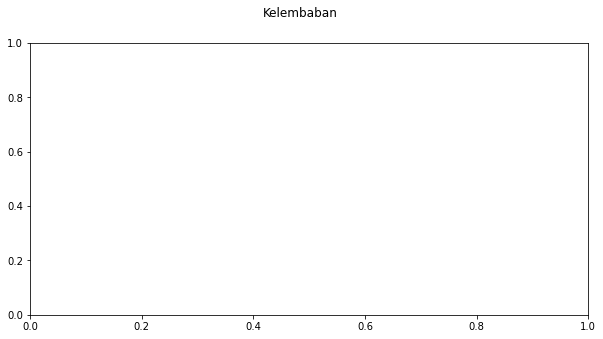

In [63]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Kelembaban') 
past, = plt.plot(train_kl.index, train_kl, 'b.-', label='train')
future, = plt.plot(test_kl.index, test_kl, 'r.-', label='test')
predicted_future, = plt.plot(test_kl.index, forecast, 'g.-', label='Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

NameError: name 'prediction_kl' is not defined

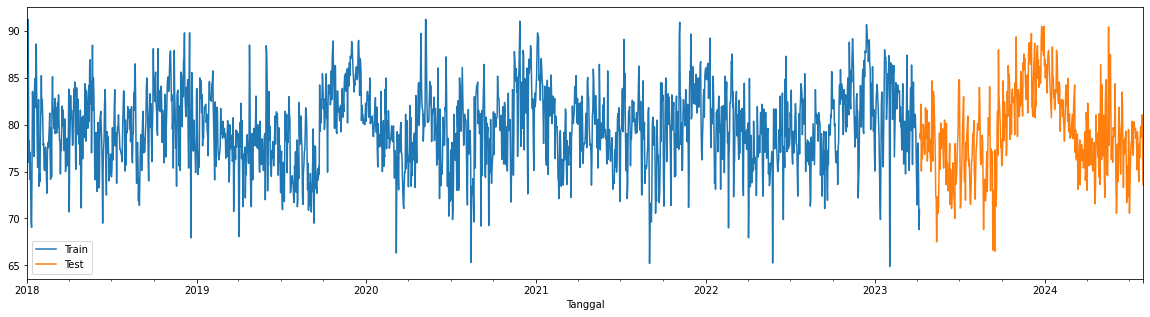

In [23]:
train_kl['Kelembaban'].plot(legend=True, label='Train', figsize=(20,5))
test_kl['Kelembaban'].plot(legend=True, label="Test")
prediction_kl.plot(legend=True,label='Prediction')
plt.title("Model Result",size=30)
plt.show()

In [ ]:
df=df.groupby('Tanggal').sum()

In [14]:
hwmodel_kl=ExponentialSmoothing(train.Kelembaban, trend='add', seasonal='mul', seasonal_periods=4).fit()

D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
test_pred=hwmodel_kl.forecast(300)

<AxesSubplot:xlabel='Tanggal'>

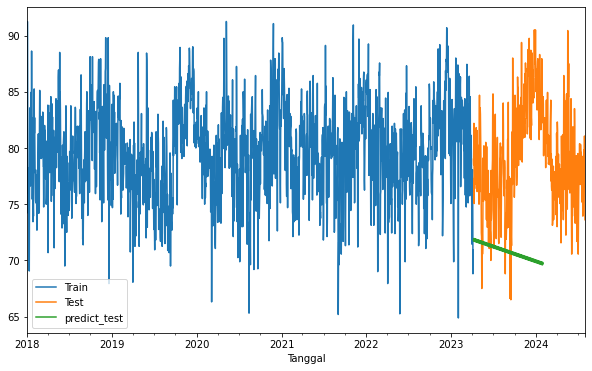

In [16]:
train['Kelembaban'].plot(legend=True, label='Train', figsize=(10,6))
test['Kelembaban'].plot(legend=True, label='Test')
test_pred.plot(legend=True, label='predict_test')

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
np.sqrt(mean_squared_error(test,test_pred))

ValueError: Found input variables with inconsistent numbers of samples: [481, 300]

In [83]:
ch = df.drop(columns=['Kelembaban','Suhu'])

<AxesSubplot:xlabel='Tanggal'>

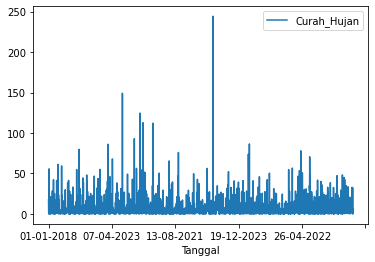

In [84]:
ch.plot()

In [85]:
# Tentukan proporsi pembagian
train_size = int(len(ch) * 0.8)

# Membagi data
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [86]:
train.tail()

,Curah_Hujan,Kelembaban,Suhu
Tanggal,,,
25-04-2018,14.80,75.75,30.26
25-04-2019,11.53,88.50,27.99
25-04-2020,5.29,81.25,29.31
25-04-2021,0.14,80.06,29.19
25-04-2022,7.14,77.75,29.91


In [99]:
hwmodel=ExponentialSmoothing(train.Curah_Hujan, trend='add', seasonal='add', seasonal_periods=4).fit()

D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '13-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
D:\anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557

In [92]:
test_pred=hwmodel.forecast(5)

NameError: name 'hwmodel' is not defined

In [93]:
decompose_result = seasonal_decompose(ch['Curah_Hujan'],model='multiplicative')

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [59]:
ch = ch.set_index('Tanggal')

Text(0, 0.5, 'Curah Hujan')

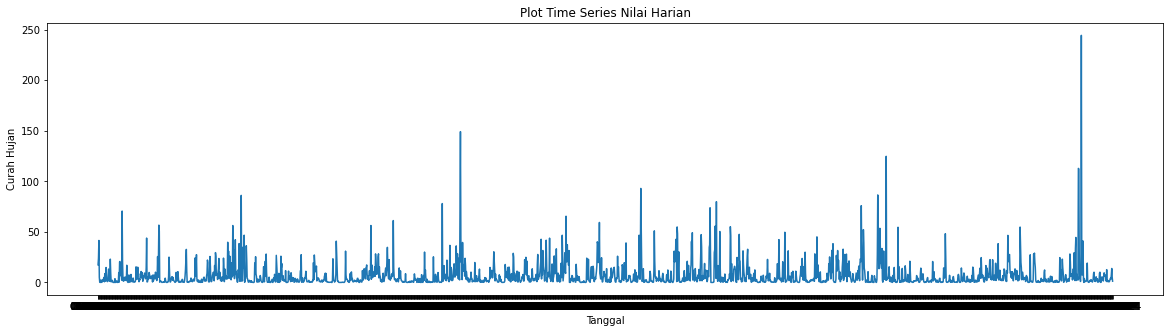

In [60]:
plt.figure(figsize=(20, 5))
plt.plot(ch.index,ch['Curah Hujan'])

# Menambahkan judul dan label
plt.title('Plot Time Series Nilai Harian')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan')

In [65]:
ch.sort_index(inplace = TRUE)

NameError: name 'TRUE' is not defined

In [47]:
from forecast import plot_components_x13
plot_components_x13(ch)
plt.show()

ModuleNotFoundError: No module named 'forecast'

In [63]:
decompose_result = seasonal_decompose(ch['Curah Hujan'], model = 'aditive')
decompose_result.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

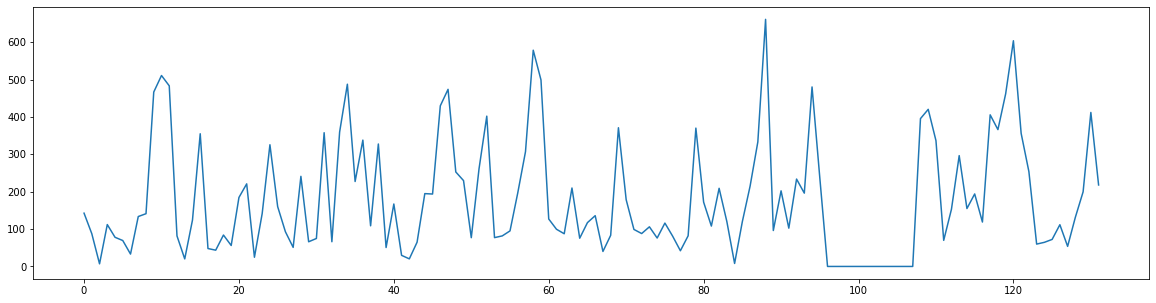

In [22]:
ch = ch['Curah Hujan'].plot(figsize=(20,5))
plt.show()

In [23]:
df_decompose = seasonal_decompose(df['SST'],model = "additive")
fig = df_decompose.plot()
fig.set_size_inches(16,9)
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

In [8]:
size = int(len(df)*0.8)
train_df = df[:size]
test_df = df[size:]

In [9]:
train_df.tail()

,SST
Tahun,
2010-08-01,880.24
2010-09-01,860.53
2010-10-01,896.96
2010-11-01,882.95
2010-12-01,919.93


NameError: name 'predictions_df' is not defined

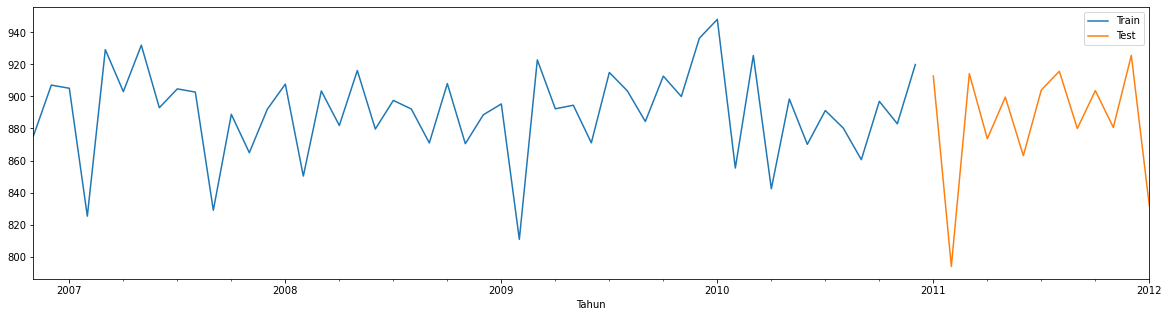

In [12]:
train_df['SST'].plot(legend=True, label="Train", figsize=(20,5))
test_df['SST'].plot(legend=True, label="Test")
predictions_df.plot(legend=True, label="Prediction")
plt.title("Model Result", size=20)
plt.show()

In [20]:
fitted_model = ExponentialSmoothing(train_df['SST'], trend='add', seasonal='add', seasonal_periods=12)
predictions_df = fitted_model.forecast(60)

AttributeError: 'ExponentialSmoothing' object has no attribute 'forecast'